# Laboratorio 1

In [ ]:
#Instalcion de todas las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import sys
from sklearn.base import BaseEstimator, ClassifierMixin
import matplotlib.pyplot as plt

### Carga de datos

In [3]:
# Uso de la libreria pandas para la lectura de archivos
data=pd.read_csv('train_data.csv', sep=',', encoding = 'utf-8')
# Asignación a una nueva variable de los datos leidos
data_t=data

In [4]:
data_t

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,class,redshift,mjd,rowv,colv
0,1237648722306924571,185.574486,0.701402,19.11034,17.62099,17.03464,16.82993,16.71711,756,5,466,0.864145,1,STAR,8.780529e-05,54140,0.002418,0.001363
1,1237648720167436418,203.801841,-0.853906,18.90957,17.62940,17.01465,16.62059,16.35239,756,1,588,0.816541,1,GALAXY,8.619995e-02,51955,0.008650,0.007056
2,1237648720685105352,160.034264,-0.421626,19.26340,17.67693,16.82551,16.42307,16.13864,756,2,295,0.870381,1,GALAXY,1.330486e-01,51913,0.003938,-0.002028
3,1237648703510937836,200.807373,-0.682024,18.82022,17.77765,17.38575,17.11128,16.93540,752,2,382,0.867801,1,GALAXY,8.636355e-02,51959,0.001839,0.001160
4,1237648720161275992,189.792404,-1.001480,18.91391,19.05355,19.46278,19.75660,20.09613,756,1,494,0.833824,1,STAR,-4.090000e-08,54562,0.001929,-0.000465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1237648720690741273,172.826005,-0.484303,18.81890,17.89273,17.54372,17.41363,17.31821,756,2,381,0.887803,1,STAR,1.521540e-04,54891,0.000675,0.000324
3996,1237649918427267086,11.165126,13.745240,17.46665,15.96142,15.36014,15.14572,15.04453,1035,1,38,0.844826,1,STAR,4.182837e-05,53242,-0.000440,-0.000301
3997,1237648720164684046,197.579529,-0.971573,19.45682,18.32555,17.86916,17.57512,17.41648,756,1,546,0.819151,1,GALAXY,8.160563e-02,51985,0.011348,0.005854
3998,1237648721206575779,124.877626,-0.048110,19.20158,17.31450,16.36573,15.91760,15.57736,756,3,60,0.894044,1,GALAXY,8.744828e-02,55888,-0.004486,-0.006072


## Entendimiento de los Datos

Antes de comenzar a analizar los datos, es fundamental identificar cuáles son más importantes que otros.

###  Variables Necesarias

- **ra (Ascensión recta)**
  - Indica la posición del objeto en el cielo.
- **dec (Declinación)**
  - Complementa la posición del objeto en coordenadas celestes.
- **u, g, r, z, i (Magnitudes en diferentes filtros)**
  - Permiten clasificar y caracterizar los objetos en función de su emisión de luz en distintos rangos de longitud de onda.
  - Son fundamentales para estimar redshifts fotométricos si se quiere hacer una estimación sin espectroscopía.
- **class**
  - Indica si el objeto es una estrella (**STAR**), una galaxia (**GALAXY**) o un cuásar (**QSO**).
  - Importante porque el redshift se aplica principalmente a galaxias y cuásares.
- **redshift**
  - Es el valor clave de estudio, ya que representa el corrimiento al rojo del objeto.
- **mjd (Día juliano)**
  - Puede ser útil si se estudian variaciones en observaciones a lo largo del tiempo.

###  Variables Opcionales o Menos Relevantes

- **run, camcol, field**
  - Se relacionan con la instrumentación del telescopio y pueden ser útiles para control de calidad, pero no necesariamente para el análisis del redshift.
- **score**
  - Indica la calidad de la observación. Podría ser útil para filtrar datos de baja calidad.
- **clean**
  - También puede ayudar a filtrar observaciones con problemas en la fotometría.
- **rowv y colv**
  - Indican velocidades en grados/día, que pueden ser útiles si se quiere analizar movimiento propio, pero no son necesarias para un análisis del redshift.




In [ ]:
#Entendimiento del tamaño del data Set a ser manejado
print('Dimensiones de los datos: ', data_t.shape, 'El primer valor corresponde a filas y el segundo a columnas')

Dimensiones de los datos:  (4000, 18) El primer valor corresponde a filas y el segundo a columnas


In [45]:
# Visualizacion de los primeros 10 datos
display(data_t.head(10))

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,class,redshift,mjd,rowv,colv
0,1237648722306924571,185.574486,0.701402,19.11034,17.62099,17.03464,16.82993,16.71711,756,5,466,0.864145,1,STAR,8.780529e-05,54140,0.002418,0.001363
1,1237648720167436418,203.801841,-0.853906,18.90957,17.62940,17.01465,16.62059,16.35239,756,1,588,0.816541,1,GALAXY,8.619995e-02,51955,0.008650,0.007056
2,1237648720685105352,160.034264,-0.421626,19.26340,17.67693,16.82551,16.42307,16.13864,756,2,295,0.870381,1,GALAXY,1.330486e-01,51913,0.003938,-0.002028
3,1237648703510937836,200.807373,-0.682024,18.82022,17.77765,17.38575,17.11128,16.93540,752,2,382,0.867801,1,GALAXY,8.636355e-02,51959,0.001839,0.001160
4,1237648720161275992,189.792404,-1.001480,18.91391,19.05355,19.46278,19.75660,20.09613,756,1,494,0.833824,1,STAR,-4.090000e-08,54562,0.001929,-0.000465
5,1237648720132178408,123.386052,-1.045499,18.52214,17.45173,17.23112,17.16427,17.13214,756,1,50,0.851417,1,STAR,1.190440e-05,53816,-0.002165,-0.000364
6,1237648720165863598,200.243728,-0.895931,18.09523,16.82764,16.18942,15.83503,15.58671,756,1,564,0.815295,0,GALAXY,4.815651e-02,51984,-0.011610,0.002361
7,1237648704054624442,216.256661,-0.220799,19.20765,18.73173,18.84302,18.98353,19.15128,752,3,486,0.804086,1,STAR,-2.234210e-04,51613,-0.002153,-0.001026
8,1237648722308890870,190.050847,0.695672,17.82951,15.90091,15.02515,14.61881,14.30353,756,5,496,0.822898,1,GALAXY,4.634102e-02,51941,-0.000474,-0.001548
9,1237648720163963081,195.951990,-0.966005,17.76132,16.51327,15.89811,15.53069,15.31236,756,1,535,0.811336,1,GALAXY,8.944633e-02,51986,0.000894,0.001024


In [12]:
# Imprimimos los diferentes tipos de las columnas
data_t.dtypes

objid         int64
ra          float64
dec         float64
u           float64
g           float64
r           float64
i           float64
z           float64
run           int64
camcol        int64
field         int64
score       float64
clean         int64
class        object
redshift    float64
mjd           int64
rowv        float64
colv        float64
dtype: object

In [ ]:
# Imprimir las columnas numericas
columnasNumericas= data_t.select_dtypes(include=['int','float']).columns
print(columnasNumericas)

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field',
       'score', 'clean', 'redshift', 'mjd', 'rowv', 'colv'],
      dtype='object')


In [17]:
data_t.describe( include='all')

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,class,redshift,mjd,rowv,colv
count,4.000000e+03,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000,4000.000000,4000.000000,4000.000000,4000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GALAXY,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1857,NaN,NaN,NaN,NaN
mean,1.237649e+18,185.523295,0.248959,18.609049,17.363397,16.839856,16.597712,16.439392,743.829000,3.37625,419.602000,0.851765,0.895500,NaN,0.134015,52957.124750,0.000218,-0.000090
std,4.244222e+11,41.689446,2.001075,0.839431,0.950964,1.055343,1.141252,1.190502,98.865936,1.69909,167.162063,0.071311,0.305946,NaN,0.379742,1601.148131,0.008794,0.007457
min,1.237646e+18,10.469743,-1.252763,13.551780,12.974870,12.362850,12.010790,11.799530,211.000000,1.00000,19.000000,0.301912,0.000000,NaN,-0.003322,51608.000000,-0.264516,-0.168807
25%,1.237649e+18,162.474666,-0.631824,18.170375,16.796110,16.190785,15.870782,15.628205,752.000000,2.00000,311.000000,0.836866,1.000000,NaN,0.000106,51821.000000,-0.001212,-0.001609
50%,1.237649e+18,195.815451,0.053336,18.843745,17.472525,16.850835,16.571195,16.402665,756.000000,3.00000,434.000000,0.860675,1.000000,NaN,0.032038,51986.000000,0.000322,0.000125
75%,1.237649e+18,214.348425,0.593396,19.261563,17.997818,17.506640,17.258833,17.147037,756.000000,5.00000,527.000000,0.879834,1.000000,NaN,0.086479,54468.000000,0.001698,0.001672


# 2 Preparación de datos

### Para mejorar la calidad de los datos vamos a revisar las filas que están duplicadas

In [21]:
print("La cantidad de duplicados es = "+str(data_t.duplicated().sum()))  # Muestra el número de filas duplicadas
print(data_t[data_t.duplicated()])

La cantidad de duplicados es = 0
Empty DataFrame
Columns: [objid, ra, dec, u, g, r, i, z, run, camcol, field, score, clean, class, redshift, mjd, rowv, colv]
Index: []


#### Luego procedemos a eliminar los duplicados

In [22]:
#Comando que elimina las filas que estan duplicadas
data_t = data_t.drop_duplicates()
print("La cantidad de duplicados es = "+str(data_t.duplicated().sum()))  # Muestra el número de filas duplicadas

La cantidad de duplicados es = 0


### Ahora vamos a empezar a revisar los datos que se encuentran mal de cada columna en base a sus datos para ver si se pueden corregir o deben de ser eliminados

In [7]:
#Para empezar revisamos si hay valores nulos en el dataset, pero no se encuentran datos nulos
data_t.isnull().sum()

objid       0
ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
run         0
camcol      0
field       0
score       0
clean       0
class       0
redshift    0
mjd         0
rowv        0
colv        0
dtype: int64

### Revisando la Columna 'ra' la cual describe Ubicación del objeto en su componente de ascensión recta de coordenada celeste.

In [8]:
data['ra'].describe()

count    4000.000000
mean      185.523295
std        41.689446
min        10.469743
25%       162.474666
50%       195.815451
75%       214.348425
max       249.758313
Name: ra, dtype: float64

In [9]:
# Ya que Ra describe la ubicación del objeto en su componente de ascensión recta de coordenada celeste. Este valor debe de estar entre 0 y 360 grados.
df_out_rango = data_t[(data_t["ra"] < 0) | (data_t["ra"] > 360)]
print(df_out_rango)

Empty DataFrame
Columns: [objid, ra, dec, u, g, r, i, z, run, camcol, field, score, clean, class, redshift, mjd, rowv, colv]
Index: []


162.474665625 214.348425475 51.87375985
84.66402585 292.15906525


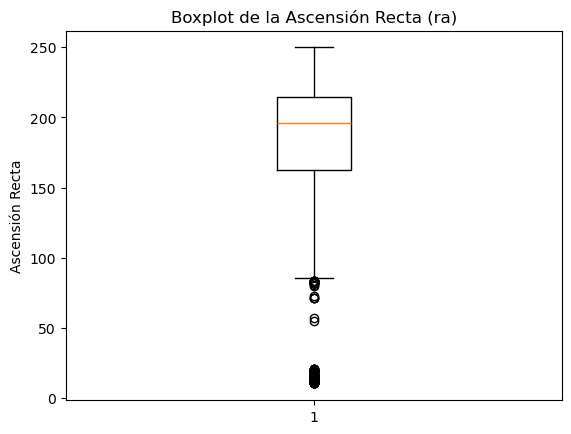

In [10]:
#Revisamos si se encuentra dentro del rango intercuartil, los valores que se encuentren por fuera de esto son outlayers [Q1−1.5×IQR,Q3+1.5×IQR]

Q1 = data_t['ra'].quantile(0.25)
Q3 = data_t['ra'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(Q1,Q3,IQR)
print(lower_bound,upper_bound) 
 
outliers = data_t[(data_t['ra'] < lower_bound) | (data_t['ra'] > upper_bound)]
# print(outliers['ra'])
outliers
plt.boxplot(data_t['ra'])
plt.title("Boxplot de la Ascensión Recta (ra)")
plt.ylabel("Ascensión Recta")
plt.show()

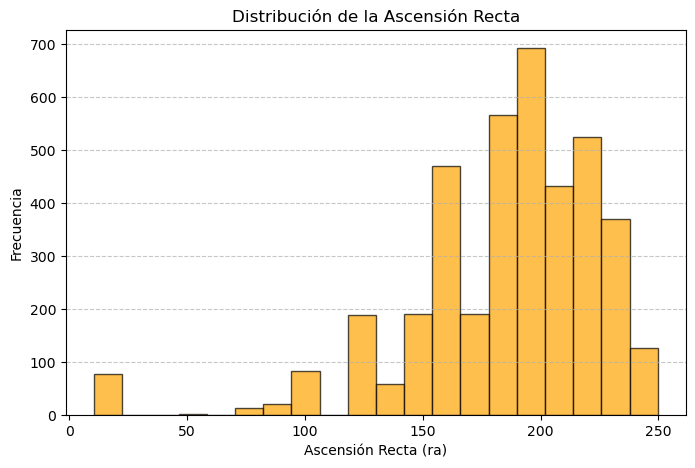

In [11]:
# Crear el histograma para visualizar la distribución de 'ra'
plt.figure(figsize=(8, 5))
plt.hist(data_t["ra"], bins=20, edgecolor="black", alpha=0.7, color="orange")
plt.xlabel("Ascensión Recta (ra)")
plt.ylabel("Frecuencia")
plt.title("Distribución de la Ascensión Recta")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [12]:
for col in data_t.select_dtypes(include=['object']):
    print(f"Valores únicos en {col}:\n", data_t[col].unique())

Valores únicos en class:
 ['STAR' 'GALAXY' 'QSO' 'S' 'QUASAR' 'G']


## Columna dec
Describe: Ubicación del objeto en su componente de declinación de coordenada celeste.

In [13]:
data_t['u'].describe()


count    4000.000000
mean       18.609049
std         0.839431
min        13.551780
25%        18.170375
50%        18.843745
75%        19.261563
max        19.599750
Name: u, dtype: float64

In [14]:
#Revisamos si cuenta con valores negativos ya no que nos pide que sea mayor a 0
negativos = data_t[(data_t['u']<=0)]
print("Los valores negativos son estos ", negativos)

Los valores negativos son estos  Empty DataFrame
Columns: [objid, ra, dec, u, g, r, i, z, run, camcol, field, score, clean, class, redshift, mjd, rowv, colv]
Index: []


## Columna g

## Columna field

#### 1. Ver los valores únicos y su frecuencia

In [37]:
print(data["field"].value_counts())  # Frecuencia de cada categoría
data['ra'].describe()

field
482    32
365    30
369    27
368    27
362    27
       ..
19      1
637     1
666     1
636     1
109     1
Name: count, Length: 663, dtype: int64


count    4000.000000
mean      185.523295
std        41.689446
min        10.469743
25%       162.474666
50%       195.815451
75%       214.348425
max       249.758313
Name: ra, dtype: float64

#### 2. Visualizar distribución de los datos

Q1: 311.0, Q3: 527.0, IQR: 216.0
Límite inferior: -13.0, Límite superior: 851.0
Número de outliers: 0


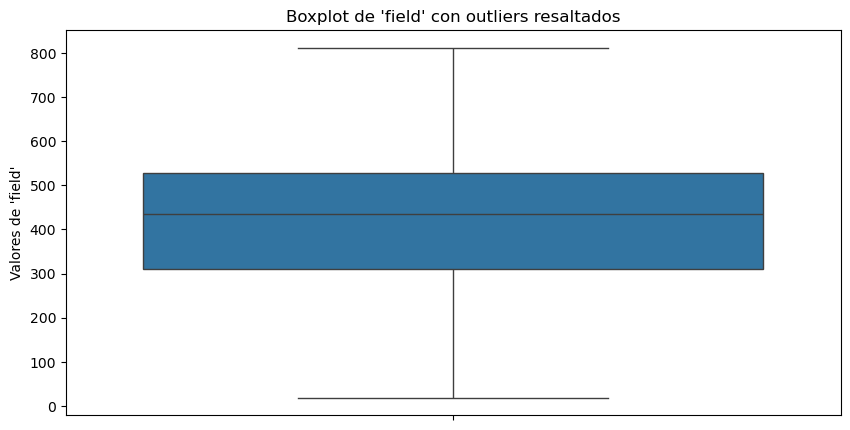

Se observa una distribución correcta de los datos con un numero 0 de anomalías
Correlación entre redshift y field: 0.04144653357568594


In [ ]:
# Calcular cuartiles y rango intercuartil (IQR)
Q1 = data_t['field'].quantile(0.25)
Q3 = data_t['field'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = data_t[(data_t['field'] < lower_bound) | (data_t['field'] > upper_bound)]
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Límite inferior: {lower_bound}, Límite superior: {upper_bound}")
print(f"Número de outliers: {len(outliers)}")

# Gráfico de caja y bigotes con puntos para outliers
plt.figure(figsize=(10, 5))
sns.boxplot(y=data_t["field"], showfliers=True, flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 6})

# Configuración del gráfico
plt.title("Boxplot de 'field' con outliers resaltados")
plt.ylabel("Valores de 'field'")

# Mostrar gráfico
plt.show()

print("Se observa una distribución correcta de los datos con un numero 0 de anomalías")
correlacion = data_t["redshift"].corr(data_t["field"])
print("Correlación entre redshift y field:", correlacion)

## Columna score

#### 1. Visualizar como se distribuyen los datos entre 0 y 1 por cuartiles

In [39]:
data_t['score'].describe()

count    3983.000000
mean        0.851756
std         0.071434
min         0.301912
25%         0.836865
50%         0.860675
75%         0.879834
max         0.961145
Name: score, dtype: float64

#### 2. Visualización Gráfica

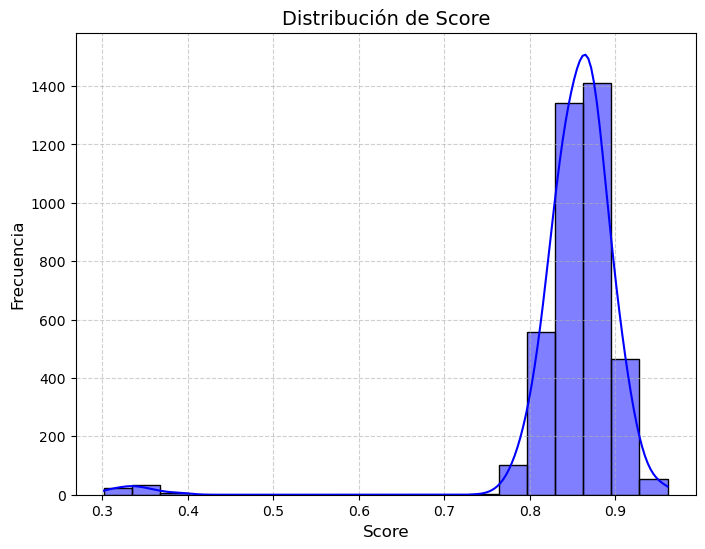

Esto nos dá a entender que la mayoría de las observaciones presentan una alta calidad, además no se presentaron datos fuera del rango 0 - 1
                   objid          ra       dec         u         g         r  \
31   1237648675605315758  242.562540  1.190245  18.42238  18.22688  18.16234   
235  1237648675606823365  246.084939  1.174142  18.78055  17.26691  16.68871   
277  1237648675605250186  242.438398  1.171876  17.91883  16.78357  16.36801   
379  1237648675603743074  238.952113  1.206012  19.54832  17.72610  16.90218   
411  1237648675608003121  248.683327  1.177546  19.46411  19.24191  19.19376   

            i         z  run  camcol  field     score  clean   class  \
31   18.02632  17.98409  745       6    560  0.337776      1     QSO   
235  16.45830  16.32949  745       6    583  0.365036      1    STAR   
277  16.02861  15.88540  745       6    559  0.338786      1  GALAXY   
379  16.43995  16.12423  745       6    536  0.303009      1  GALAXY   
411  19.01704  19.0

In [ ]:
# Crear el histograma
plt.figure(figsize=(8, 6))
sns.histplot(data_t['score'], bins=20, kde=True, color='blue', edgecolor='black')
plt.title("Distribución de Score", fontsize=14)
plt.xlabel("Score", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
print("Esto nos dá a entender que la mayoría de las observaciones presentan una alta calidad, además no se presentaron datos fuera del rango 0 - 1")

#### 3. Eliminar datos que tienen una score y un clean 0

Decidimos eliminar ciertos datos con una score y clean bajo ya que no aportan mucho a nuestro analisis

In [15]:
print(data_t.shape)
data_t = data_t[~((data_t["score"] < 0.4) & (data_t["clean"] == 0))]
print(data_t.shape)

(4000, 18)
(3991, 18)


## Columna clean

#### 1. Describir por cuartiles los datos de clean

In [50]:
data_t['clean'].describe()

count    3983.000000
mean        0.895305
std         0.306198
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: clean, dtype: float64

#### 2. Análisis grafico para detectar anomalías

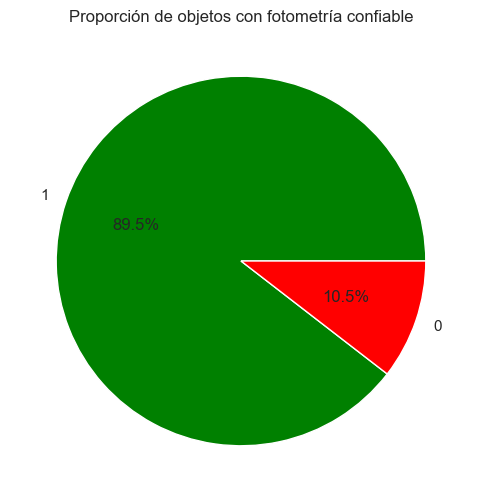

Se observa que todos los datos son binarios , es decir 0 o 1, no se detectaron anomalías


In [56]:
plt.figure(figsize=(6,6))
data_t['clean'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'])

plt.title("Proporción de objetos con fotometría confiable")
plt.ylabel("")
plt.show()
print("Se observa que todos los datos son binarios , es decir 0 o 1, no se detectaron anomalías")

## Columna class

#### 1. Revisión de como se distribuyen las clases

In [58]:
data_t['class'].describe()
print("Valores únicos en 'class':", data_t['class'].unique())
print("\nValores nulos en 'class':", data_t['class'].isnull().sum())

# Ver distribución de las clases
print("\nDistribución de clases:")
print(data_t['class'].value_counts())


Valores únicos en 'class': ['STAR' 'GALAXY' 'QSO' 'S' 'QUASAR' 'G']

Valores nulos en 'class': 0

Distribución de clases:
class
GALAXY    1847
STAR      1625
QSO        291
S          175
G           44
QUASAR       1
Name: count, dtype: int64


#### 2. Como se detectaron anomalías en las clasificaciones , se hace una normalización

En este caso por intuición vamos a tomar los datos de clasificación G y convertirlos GALAXY

In [60]:
# Reemplazar 'G' por 'GALAXY'
data_t['class'] = data_t['class'].replace('G', 'GALAXY')

Por otro lado para los datos que tienen la clasificación S los modificaremos para que sean STAR

In [59]:
# Reemplazar 'S' por 'STAR'
data_t['class'] = data_t['class'].replace('S', 'STAR')

Tambien para hacer el uso de solo una etiqueta cambiamos Quasar por QSO

In [61]:
# Reemplazar 'QUASAR' por 'QSO'
data_t['class'] = data_t['class'].replace('QUASAR', 'QSO')

Luego volvemos a revisar si ya se hicieron los cambios correctamente

In [62]:
data_t['class'].describe()
print("Valores únicos en 'class':", data_t['class'].unique())
print("\nValores nulos en 'class':", data_t['class'].isnull().sum())

# Ver distribución de las clases
print("\nDistribución de clases:")
print(data_t['class'].value_counts())

Valores únicos en 'class': ['STAR' 'GALAXY' 'QSO']

Valores nulos en 'class': 0

Distribución de clases:
class
GALAXY    1891
STAR      1800
QSO        292
Name: count, dtype: int64


#### 3. Transformación para facilitar el modelo de regresión

In [ ]:
data_t = pd.get_dummies(data_t, columns=['class'], prefix='class')

#### 4. Análisis Gráfico de la columna

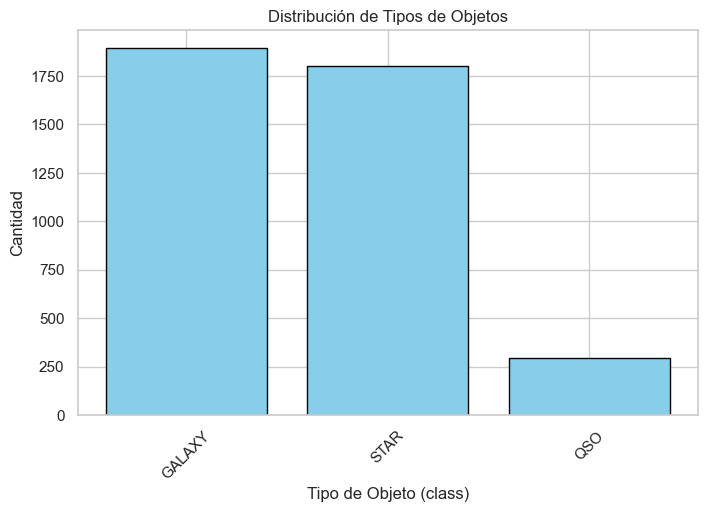

In [63]:
# Contar las ocurrencias de cada clase
class_counts = data_t['class'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(class_counts.index, class_counts.values, color='skyblue', edgecolor='black')

# Etiquetas y título
plt.xlabel("Tipo de Objeto (class)")
plt.ylabel("Cantidad")
plt.title("Distribución de Tipos de Objetos")
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visibilidad

# Mostrar el gráfico
plt.show()


## Columna Camcol

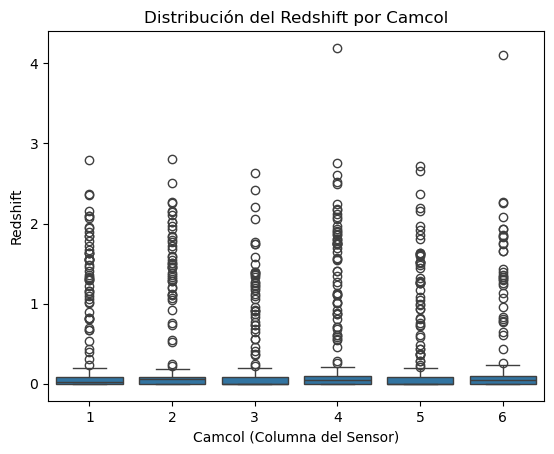

Correlación entre camcol y redshift: -0.003906015457972524


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data_t["camcol"], y=data_t["redshift"])
plt.xlabel("Camcol (Columna del Sensor)")
plt.ylabel("Redshift")
plt.title("Distribución del Redshift por Camcol")
plt.show()
correlation = data_t["camcol"].corr(data_t["redshift"])
print("Correlación entre camcol y redshift:", correlation)

Analizando la correlación decidimos que no es una variable que influye directamente al redshift entonces la omitimos